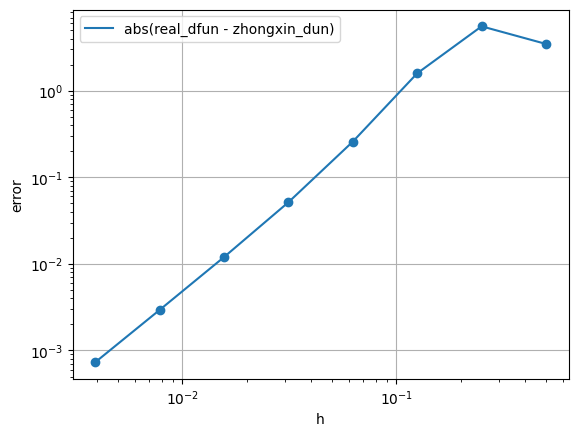

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def fun(x):
    return np.cos(x**3)
#真实导数
def dfun(x):
    return -3*(x**2)*np.sin(x**3)
#中心二阶差分公式
def dfun1(x,h):
    return (fun(x+h)-fun(x-h))/(2*h)
h = [2**(-i) for i in range(1,9)]
x0 = 4*np.pi/5
real_daoshu = dfun(x0)
real_daoshus = [real_daoshu for _ in range(8)]
zhongxin_caifendaoshus = []
for i in range(8):
    zhongxin_caifendaoshu = dfun1(x0,h[i])
    zhongxin_caifendaoshus.append(zhongxin_caifendaoshu)
errors = []
for i in range(8):
    error = abs(real_daoshus[i] - zhongxin_caifendaoshus[i])
    errors.append(error)
plt.loglog(h,errors,label = 'abs(real_dfun - zhongxin_dun)')
plt.scatter(h,errors)
plt.xlabel('h')
plt.ylabel('error')
plt.grid(True)
plt.legend()
plt.show()

<>:80: SyntaxWarning: invalid escape sequence '\l'
<>:98: SyntaxWarning: invalid escape sequence '\c'
<>:107: SyntaxWarning: invalid escape sequence '\s'
<>:116: SyntaxWarning: invalid escape sequence '\s'
<>:80: SyntaxWarning: invalid escape sequence '\l'
<>:98: SyntaxWarning: invalid escape sequence '\c'
<>:107: SyntaxWarning: invalid escape sequence '\s'
<>:116: SyntaxWarning: invalid escape sequence '\s'
C:\Users\leikun\AppData\Local\Temp\ipykernel_20528\3008613410.py:80: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Integral 1: $x\ln(1+x)$')
C:\Users\leikun\AppData\Local\Temp\ipykernel_20528\3008613410.py:98: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Integral 3: $e^x\cos(x)$')
C:\Users\leikun\AppData\Local\Temp\ipykernel_20528\3008613410.py:107: SyntaxWarning: invalid escape sequence '\s'
  plt.title('Integral 4: $\sqrt{x}\ln(x)$')
C:\Users\leikun\AppData\Local\Temp\ipykernel_20528\3008613410.py:116: SyntaxWarning: invalid escape sequence '\s'
  plt.title

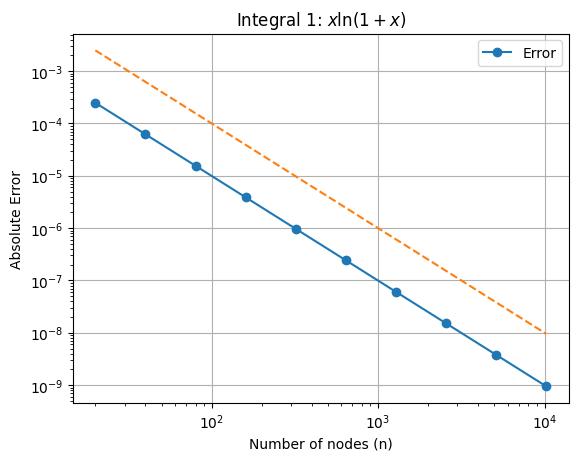

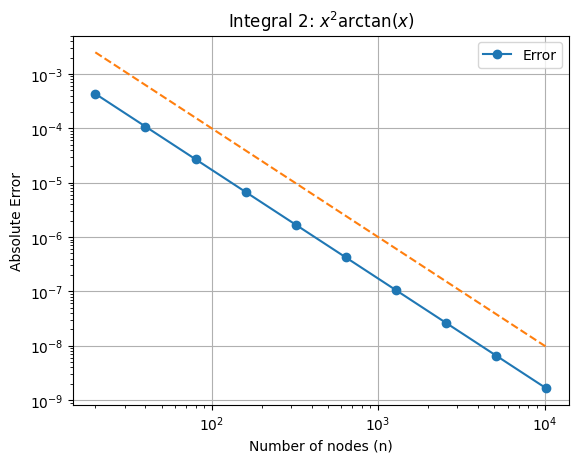

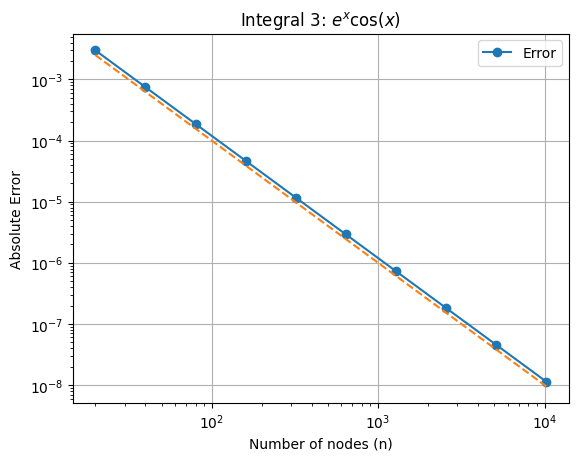

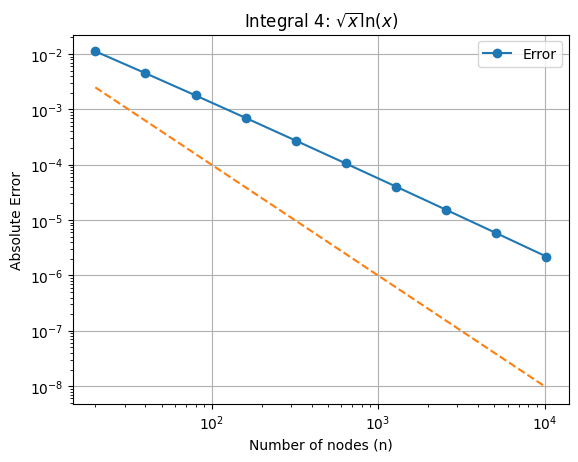

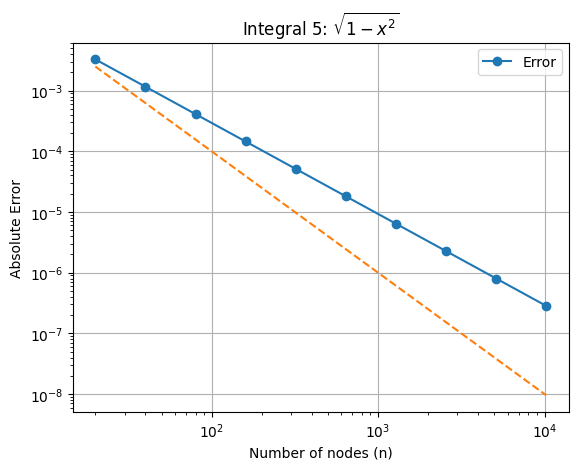

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义梯形积分函数
def trapezoid(f, a, b, n):
   
    h = (b - a) / n
    t = np.linspace(a, b, n + 1)
    y = np.array([f(x) for x in t])
    T = h * (np.sum(y[1:n]) + 0.5 * (y[0] + y[-1]))
    return T, t, y

# 定义积分函数
def integral_1(x):
    return x * np.log(1 + x)

def integral_2(x):
    return x ** 2 * np.arctan(x)

def integral_3(x):
    return np.exp(x) * np.cos(x)

def integral_4(x):
    # 处理x=0处的奇点
    if np.isclose(x, 0):
        return 0  # 当x趋近于0时，函数值趋近于0
    return np.sqrt(x) * np.log(x)

def integral_5(x):
    return np.sqrt(1 - x ** 2)

# 定义积分的准确值
true_value1 = 1 / 4
true_value2 = (np.pi - 2 + 2 * np.log(2)) / 12
true_value3 = (np.exp(np.pi / 2) - 1) / 2
true_value4 = -4 / 9
true_value5 = np.pi / 4

# 定义节点数量序列
ns = [10*2**i for i in range(1,11)]

# 将n_values转换为浮点数数组
n_values_float = np.array(ns, dtype=float)

# 存储每个积分在不同n下的误差
errors_1 = []
errors_2 = []
errors_3 = []
errors_4 = []
errors_5 = []

for n in ns:
    # 使用梯形积分法计算近似值
    approx_value_1, _, _ = trapezoid(integral_1, 0, 1, n)
    approx_value_2, _, _ = trapezoid(integral_2, 0, 1, n)
    approx_value_3, _, _ = trapezoid(integral_3, 0, np.pi / 2, n)
    eps = 1e-10  # 处理积分4在x=0处的奇异性
    approx_value_4, _, _ = trapezoid(integral_4, eps, 1, n)
    approx_value_5, _, _ = trapezoid(integral_5, 0, 1, n)

    # 计算误差
    error_1 = np.abs(approx_value_1 - true_value1)
    error_2 = np.abs(approx_value_2 - true_value2)
    error_3 = np.abs(approx_value_3 - true_value3)
    error_4 = np.abs(approx_value_4 - true_value4)
    error_5 = np.abs(approx_value_5 - true_value5)

    errors_1.append(error_1)
    errors_2.append(error_2)
    errors_3.append(error_3)
    errors_4.append(error_4)
    errors_5.append(error_5)



theoretical_errors = [1 / (n ** 2) for n in ns]
# 绘制误差图
plt.loglog(ns, errors_1, 'o-', label='Error')
plt.loglog(ns,theoretical_errors,'--')
plt.title('Integral 1: $x\ln(1+x)$')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.legend()
plt.show()

plt.loglog(ns, errors_2, 'o-', label='Error')
plt.loglog(ns,theoretical_errors,'--')
plt.title('Integral 2: $x^2\\arctan(x)$')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.legend()
plt.show()

plt.loglog(ns, errors_3, 'o-', label='Error')
plt.loglog(ns,theoretical_errors,'--')
plt.title('Integral 3: $e^x\cos(x)$')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.legend()
plt.show()

plt.loglog(ns, errors_4, 'o-', label='Error')
plt.loglog(ns,theoretical_errors,'--')
plt.title('Integral 4: $\sqrt{x}\ln(x)$')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.legend()
plt.show()

plt.loglog(ns, errors_5, 'o-', label='Error')
plt.loglog(ns,theoretical_errors,'--')
plt.title('Integral 5: $\sqrt{1-x^2}$')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.legend()
plt.show()




<>:102: SyntaxWarning: invalid escape sequence '\l'
<>:120: SyntaxWarning: invalid escape sequence '\c'
<>:129: SyntaxWarning: invalid escape sequence '\s'
<>:138: SyntaxWarning: invalid escape sequence '\s'
<>:102: SyntaxWarning: invalid escape sequence '\l'
<>:120: SyntaxWarning: invalid escape sequence '\c'
<>:129: SyntaxWarning: invalid escape sequence '\s'
<>:138: SyntaxWarning: invalid escape sequence '\s'
C:\Users\leikun\AppData\Local\Temp\ipykernel_25500\531651782.py:102: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Integral 1: $x\ln(1+x)$')
C:\Users\leikun\AppData\Local\Temp\ipykernel_25500\531651782.py:120: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Integral 3: $e^x\cos(x)$')
C:\Users\leikun\AppData\Local\Temp\ipykernel_25500\531651782.py:129: SyntaxWarning: invalid escape sequence '\s'
  plt.title('Integral 4: $\sqrt{x}\ln(x)$')
C:\Users\leikun\AppData\Local\Temp\ipykernel_25500\531651782.py:138: SyntaxWarning: invalid escape sequence '\s'
  plt.tit

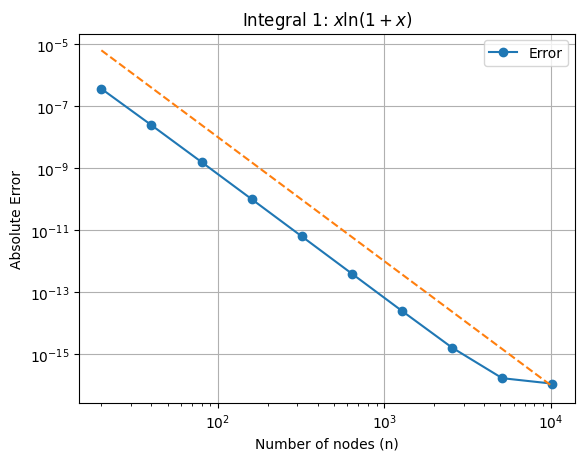

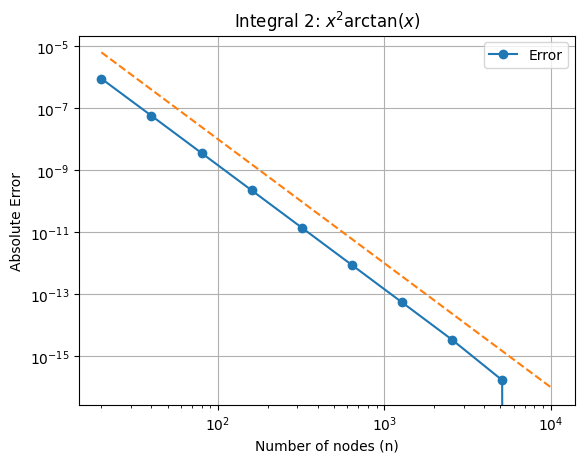

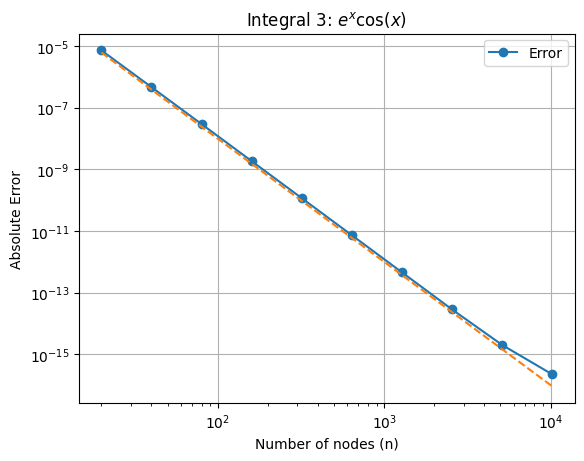

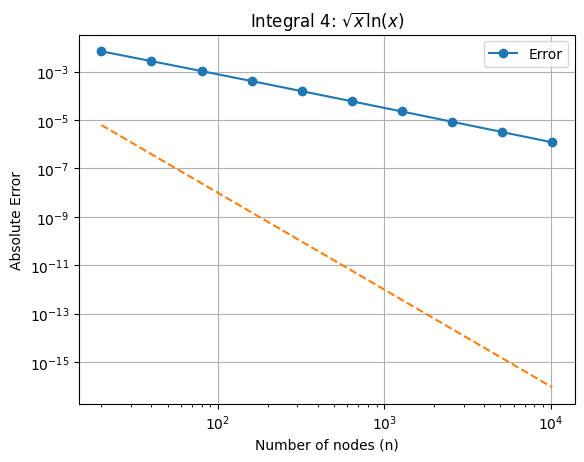

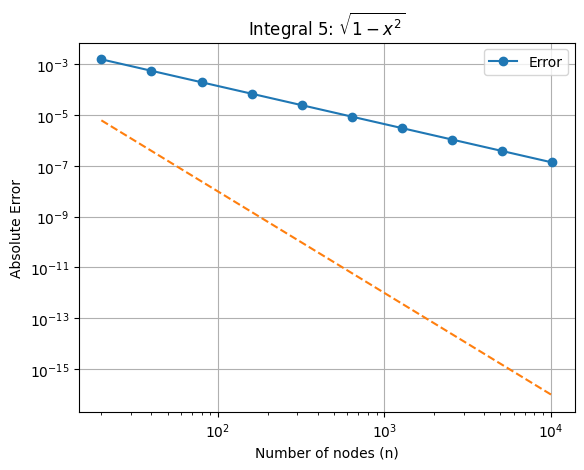

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义梯形积分函数
def trapezoid(f, a, b, n):
   
    h = (b - a) / n
    t = np.linspace(a, b, n + 1)
    y = np.array([f(x) for x in t])
    T = h * (np.sum(y[1:n]) + 0.5 * (y[0] + y[-1]))
    return T, t, y

# 定义Gregory积分函数
def gregory(f, a, b, n):
    """Gregory积分公式实现"""
    T, t, y = trapezoid(f, a, b, n)
    h = (b - a) / n
    
    # 确保有足够的点进行修正
    if n >= 3:
        correction = h / 24 * (
            3 * (y[-1] + y[0]) - 
            4 * (y[-2] + y[1]) + 
            (y[-3] + y[2])
        )
    else:
        correction = 0
    
    return T - correction, t, y

# 定义积分函数
def integral_1(x):
    return x * np.log(1 + x)

def integral_2(x):
    return x ** 2 * np.arctan(x)

def integral_3(x):
    return np.exp(x) * np.cos(x)

def integral_4(x):
    # 处理x=0处的奇点
    if np.isclose(x, 0):
        return 0  # 当x趋近于0时，函数值趋近于0
    return np.sqrt(x) * np.log(x)

def integral_5(x):
    return np.sqrt(1 - x ** 2)

# 定义积分的准确值
true_value1 = 1 / 4
true_value2 = (np.pi - 2 + 2 * np.log(2)) / 12
true_value3 = (np.exp(np.pi / 2) - 1) / 2
true_value4 = -4 / 9
true_value5 = np.pi / 4

# 定义节点数量序列
ns = [10*2**i for i in range(1,11)]

# 将n_values转换为浮点数数组
n_values_float = np.array(ns, dtype=float)

# 存储每个积分在不同n下的误差
errors_greg_1 = []
errors_greg_2 = []
errors_greg_3 = []
errors_greg_4 = []
errors_greg_5 = []

for n in ns:
    # 使用梯形积分法计算近似值
    approx_value_1, _, _ = trapezoid(integral_1, 0, 1, n)
    approx_value_2, _, _ = trapezoid(integral_2, 0, 1, n)
    approx_value_3, _, _ = trapezoid(integral_3, 0, np.pi / 2, n)
    eps = 1e-20  # 处理积分4在x=0处的奇异性
    approx_value_4, _, _ = trapezoid(integral_4, eps, 1, n)
    approx_value_5, _, _ = trapezoid(integral_5, 0, 1, n)

    # 使用Gregory积分法计算近似值
    greg_1, _, _ = gregory(integral_1, 0, 1, n)
    greg_2, _, _ = gregory(integral_2, 0, 1, n)
    greg_3, _, _ = gregory(integral_3, 0, np.pi / 2, n)
    greg_4, _, _ = gregory(integral_4, eps, 1, n)
    greg_5, _, _ = gregory(integral_5, 0, 1, n)

    # 计算误差
    errors_greg_1.append(np.abs(greg_1 - true_value1))
    errors_greg_2.append(np.abs(greg_2 - true_value2))
    errors_greg_3.append(np.abs(greg_3 - true_value3))
    errors_greg_4.append(np.abs(greg_4 - true_value4))
    errors_greg_5.append(np.abs(greg_5 - true_value5))

  




theoretical_errors = [1 / (n ** 2) for n in ns]
# 绘制误差图
plt.loglog(ns, errors_greg_1, 'o-', label='Error')
plt.loglog(ns,theoretical_errors,'--')
plt.title('Integral 1: $x\ln(1+x)$')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.legend()
plt.show()

plt.loglog(ns, errors_greg_2, 'o-', label='Error')
plt.loglog(ns,theoretical_errors,'--')
plt.title('Integral 2: $x^2\\arctan(x)$')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.legend()
plt.show()

plt.loglog(ns, errors_greg_3, 'o-', label='Error')
plt.loglog(ns,theoretical_errors,'--')
plt.title('Integral 3: $e^x\cos(x)$')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.legend()
plt.show()

plt.loglog(ns, errors_greg_4, 'o-', label='Error')
plt.loglog(ns,theoretical_errors,'--')
plt.title('Integral 4: $\sqrt{x}\ln(x)$')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.legend()
plt.show()

plt.loglog(ns, errors_greg_5, 'o-', label='Error')
plt.loglog(ns,theoretical_errors,'--')
plt.title('Integral 5: $\sqrt{1-x^2}$')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.legend()
plt.show()




C:\Users\leikun\AppData\Local\Temp\ipykernel_20528\50996856.py:80: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leikun\AppData\Local\Temp\ipykernel_20528\50996856.py:80: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leikun\AppData\Local\Temp\ipykernel_20528\50996856.py:80: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leikun\AppData\Local\Temp\ipykernel_20528\50996856.py:80: UserWarning: Glyph 35823 (\N{CJK UNIFIED IDEOGRAPH-8BEF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leikun\AppData\Local\Temp\ipykernel_20528\50996856.py:80: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leikun\AppData\Local\Temp\ipykernel_20528\50996856.py:80: UserWarning: Glyph 23454 (\N{CJK 

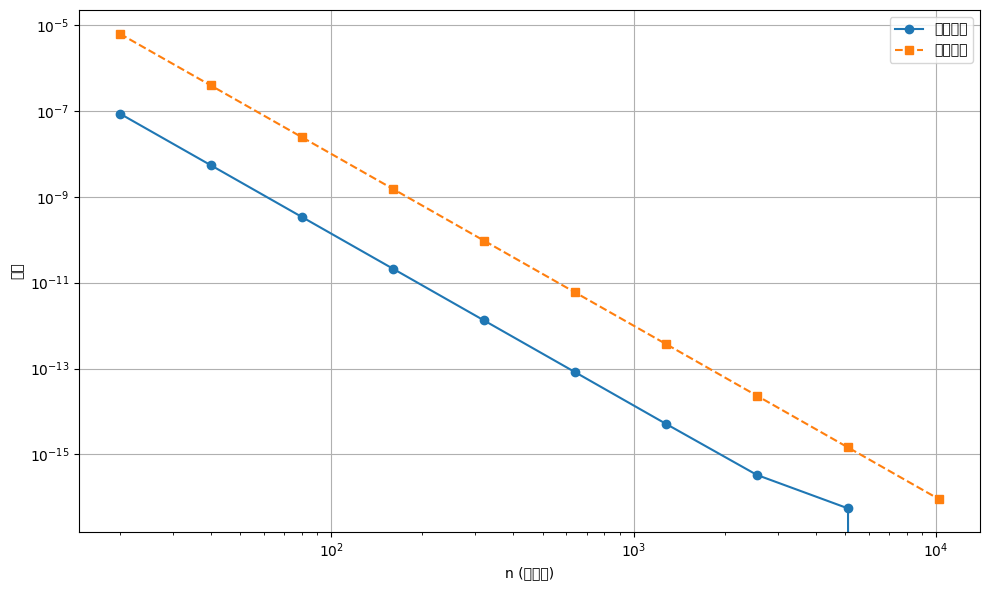

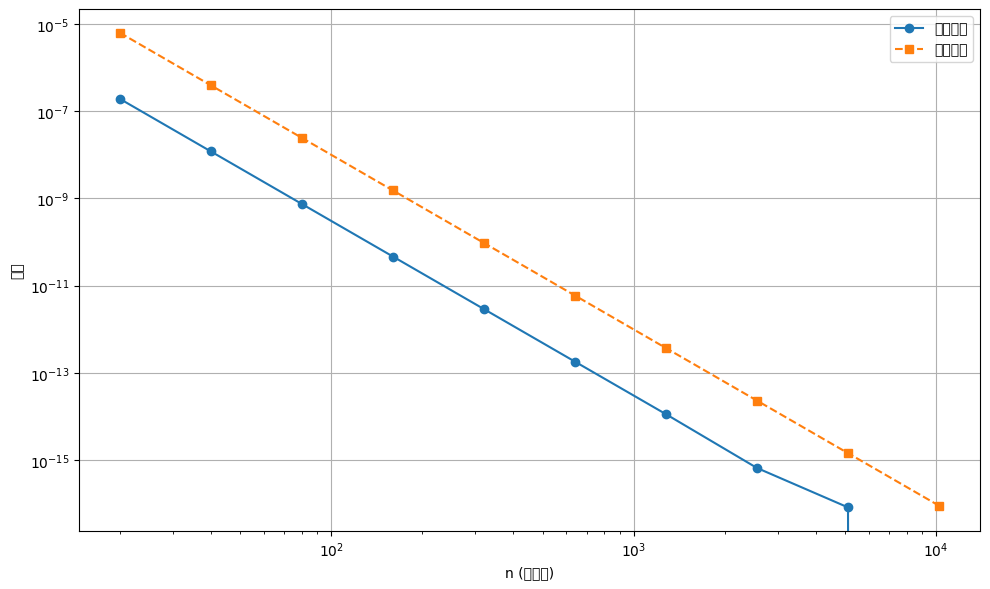

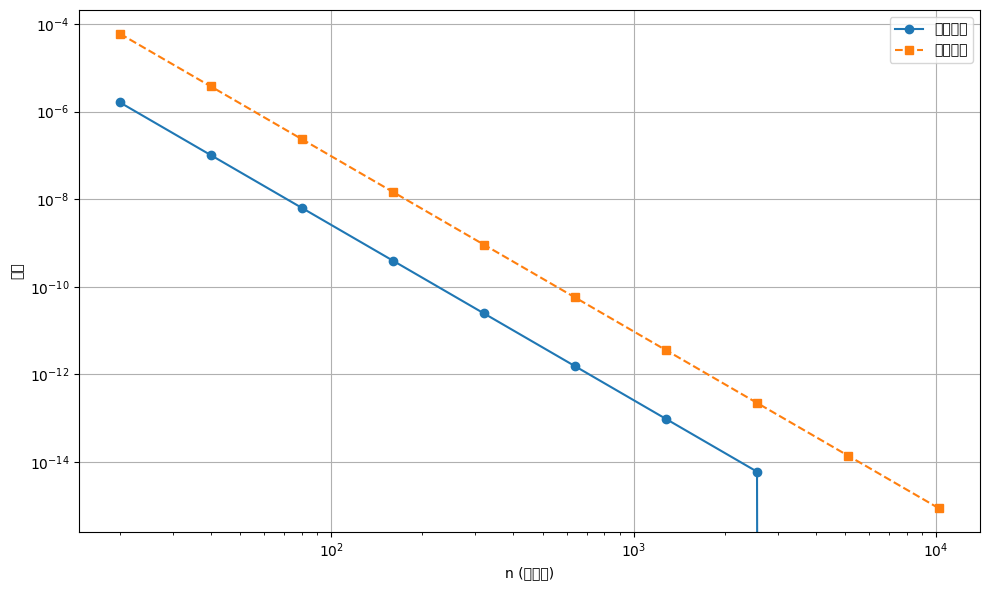

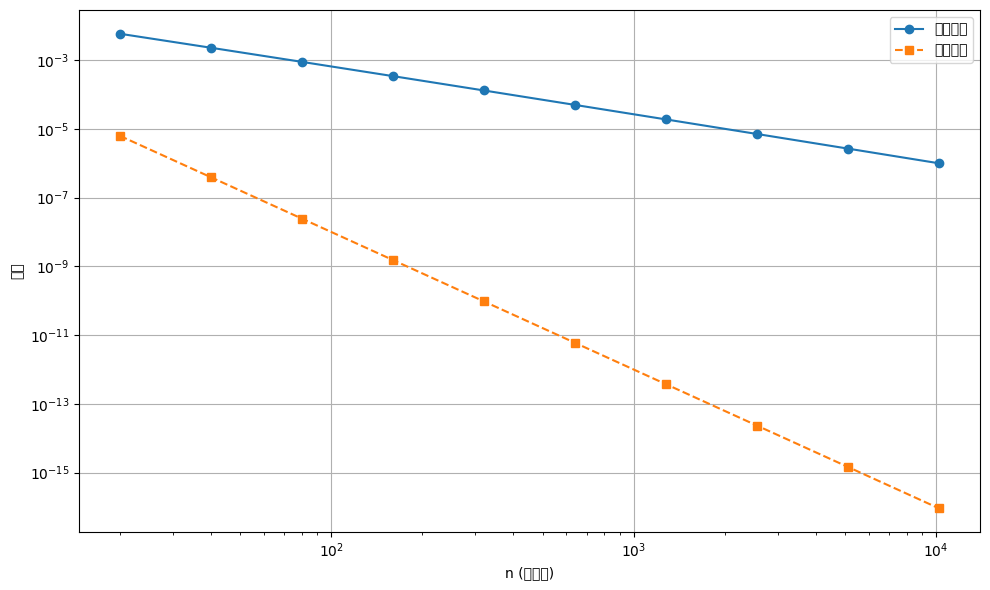

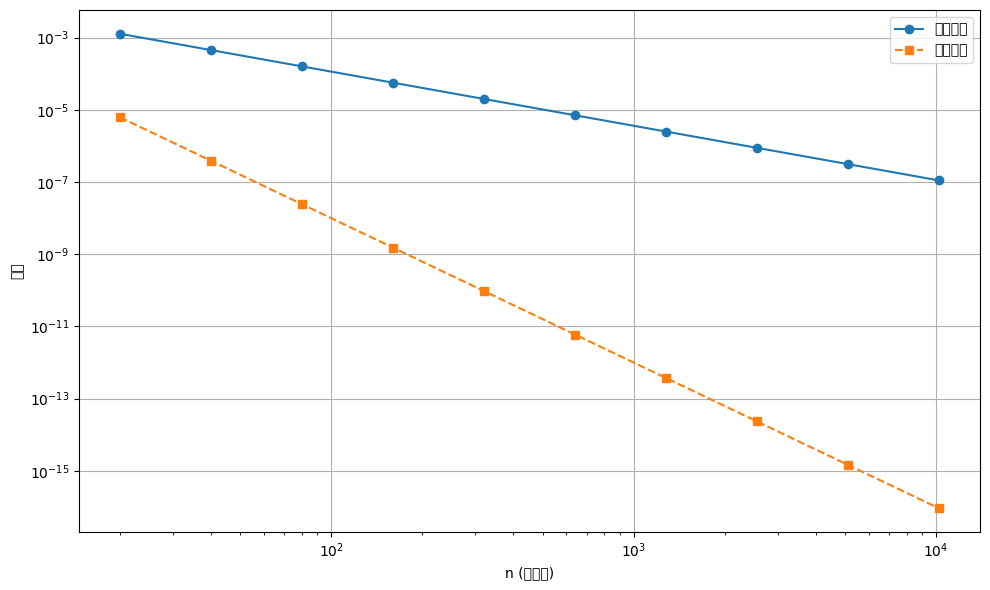

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定义积分函数
def integral_1(x):
    return x * np.log(1 + x)

def integral_2(x):
    return x ** 2 * np.arctan(x)

def integral_3(x):
    return np.exp(x) * np.cos(x)

def integral_4(x):
    # 改进的奇点处理，使用更稳定的数值计算
    x = np.asarray(x)
    result = np.zeros_like(x)
    mask = (x > 0) & (~np.isclose(x, 0))
    result[mask] = np.sqrt(x[mask]) * np.log(x[mask])
    
    # 对于非常接近0的点，使用泰勒展开近似
    near_zero = (x > 0) & (x < 1e-10)
    if np.any(near_zero):
        # f(x) ≈ -2x^(3/2)/3 当x接近0时
        result[near_zero] = -2/3 * x[near_zero]**(3/2)
    
    return result

def integral_5(x):
    return np.sqrt(1 - x ** 2)

# Simpson公式实现
def simpson(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n必须为偶数")
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    
    # 确保不直接计算x=0处的值
    if a == 0 and n > 0:
        x[0] = 1e-15  # 用一个非常小的正数代替0
    
    y = f(x)
    s = y[0] + y[-1]
    s += 4 * np.sum(y[1:-1:2])  # 奇数点
    s += 2 * np.sum(y[2:-2:2])  # 偶数点
    return (h / 3) * s
#误差函数
def calculate_errors(f, a, b, exact_value, n_values):
   
    errors = []
    theoretical_errors = []
    
    for n in n_values:
        # 计算数值积分
        approx = simpson(f, a, b, n)
        
        # 计算实际误差
        error = abs(approx - exact_value)
        errors.append(error)
        
        # 计算理论误差 (O(h^4) = O((b-a)^4/n^4))
        h = (b - a) / n
        theoretical_error = (b - a) * h**4  # 简化的理论误差估计
        theoretical_errors.append(theoretical_error)
    
    return errors, theoretical_errors
#绘图函数
def plot_fun(n_values,errors,theoretical_errors):
    # 绘制收敛性图
    plt.figure(figsize=(10, 6))
    plt.loglog(n_values, errors, 'o-', label='实际误差')
    plt.loglog(n_values, theoretical_errors, 's--', label='理论误差')
    plt.xlabel('n (区间数)')
    plt.ylabel('误差')
    plt.grid(True)
    plt.legend()
    
    # 确保图表显示
    plt.tight_layout()
    plt.show()
# a
a = 0
b = 1
n_values = [10*2**i for i in range(1,11)]
exact_value = 1/4  

# 计算误差
errors, theoretical_errors = calculate_errors(integral_1, a, b, exact_value, n_values)

# 绘制收敛性图
plot_fun(n_values, errors, theoretical_errors)

# b
a = 0
b = 1
n_values = [10*2**i for i in range(1,11)]
exact_value = (np.pi-2+2*np.log(2))/12   

# 计算误差
errors, theoretical_errors = calculate_errors(integral_2, a, b, exact_value, n_values)

# 绘制收敛性图
plot_fun(n_values, errors, theoretical_errors)

# c
a = 0
b = np.pi/2
n_values = [10*2**i for i in range(1,11)]
exact_value = (np.exp(np.pi/2)-1)/2

# 计算误差
errors, theoretical_errors = calculate_errors(integral_3, a, b, exact_value, n_values)

# 绘制收敛性图
plot_fun(n_values, errors, theoretical_errors)

# d
a = 0
b = 1
n_values = [10*2**i for i in range(1,11)]
exact_value = -4/9

# 计算误差
errors, theoretical_errors = calculate_errors(integral_4, a, b, exact_value, n_values)

# 绘制收敛性图
plot_fun(n_values, errors, theoretical_errors)

# e
a = 0
b = 1
n_values = [10*2**i for i in range(1,11)]
exact_value = np.pi/4

# 计算误差
errors, theoretical_errors = calculate_errors(integral_5, a, b, exact_value, n_values)

# 绘制收敛性图
plot_fun(n_values, errors, theoretical_errors)

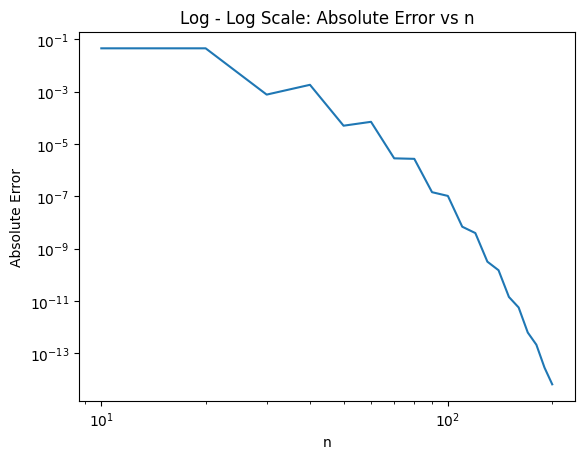

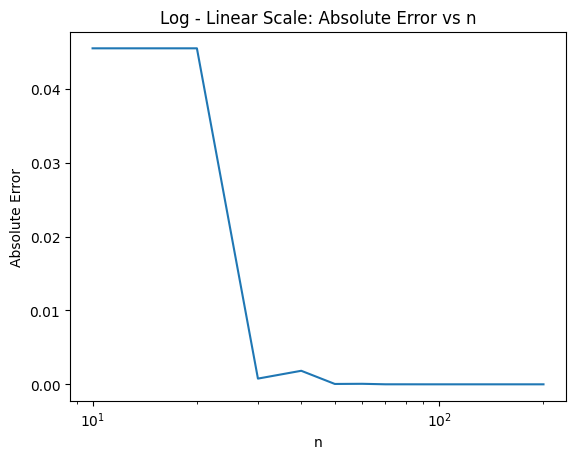

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1 / (2.01 + np.sin(6 * np.pi * x) - np.cos(2 * np.pi * x))

true_value = 0.9300357672424684
n_values = np.arange(10, 201, 10)
errors = []
for n in n_values:
    h = 1 / n
    x = np.linspace(0, 1, n + 1)
    y = f(x)
    Tn = h / 2 * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
    error = np.abs(Tn - true_value)
    errors.append(error)
#对数对数图
plt.loglog(n_values, errors)
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.title('Log - Log Scale: Absolute Error vs n')
plt.show()
#对数线性
plt.semilogx(n_values, errors)
plt.xlabel('n')
plt.ylabel('Absolute Error')
plt.title('Log - Linear Scale: Absolute Error vs n')
plt.show()

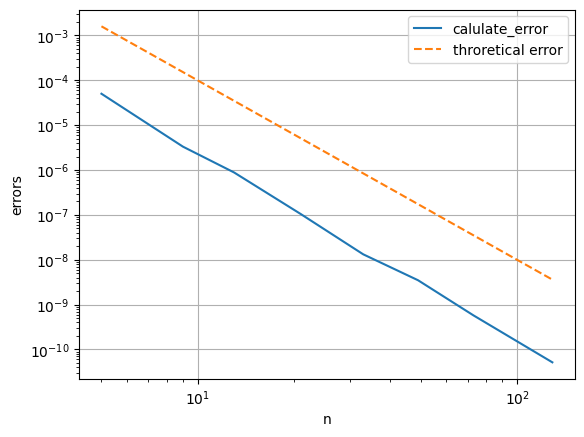

容忍度         误差                    点数 
0.0001  ,  5.0266982382252134e-05    ,  5
1e-05   ,  3.321173621007034e-06     ,  9
1e-06   ,  8.858609100159676e-07     ,  13
1e-07   ,  1.0538004330262751e-07    ,  21
1e-08   ,  1.3227743234089928e-08    ,  33
1e-09   ,  3.49310641523104e-09      ,  49
1e-10   ,  5.777161526943075e-10     ,  73
1e-11   ,  5.173578232486875e-11     ,  129


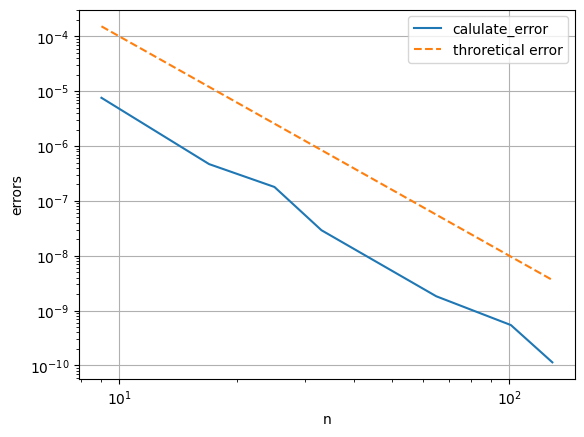

容忍度         误差                    点数 
0.0001  ,  7.582832762614844e-06     ,  9
1e-05   ,  7.582832762614844e-06     ,  9
1e-06   ,  4.681095683578551e-07     ,  17
1e-07   ,  1.7931203175058918e-07    ,  25
1e-08   ,  2.9169059945211018e-08    ,  33
1e-09   ,  1.8217056474423288e-09    ,  65
1e-10   ,  5.43859568491456e-10      ,  101
1e-11   ,  1.1383541331788649e-10    ,  129


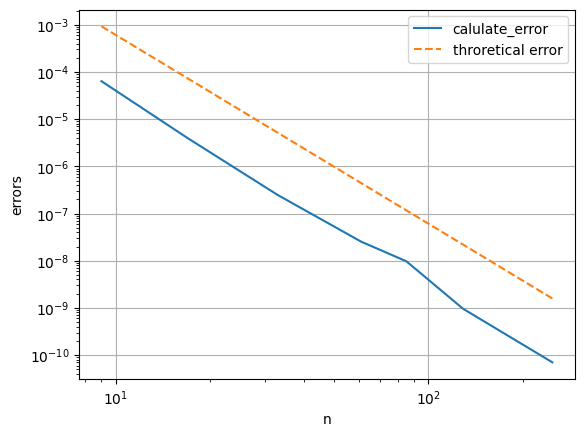

容忍度         误差                    点数 
0.0001  ,  6.380592467358781e-05     ,  9
1e-05   ,  3.946858164738387e-06     ,  17
1e-06   ,  3.946858164738387e-06     ,  17
1e-07   ,  2.4603455894833814e-07    ,  33
1e-08   ,  2.5249323964970927e-08    ,  61
1e-09   ,  9.729600680685735e-09     ,  85
1e-10   ,  9.6028518470348e-10       ,  129
1e-11   ,  7.027756154798226e-11     ,  249


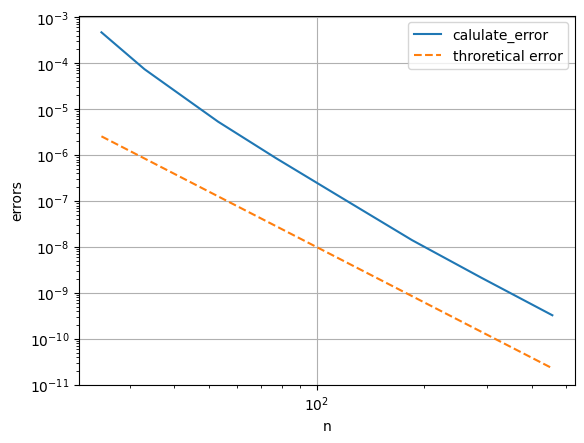

容忍度         误差                    点数 
0.0001  ,  0.0004691958546458319     ,  25
1e-05   ,  7.389882779551549e-05     ,  33
1e-06   ,  5.3449617831713425e-06    ,  53
1e-07   ,  8.573261952027345e-07     ,  77
1e-08   ,  1.4171517442873593e-07    ,  113
1e-09   ,  1.4116109281481215e-08    ,  185
1e-10   ,  2.1519319659546454e-09    ,  289
1e-11   ,  3.272613291471771e-10     ,  457


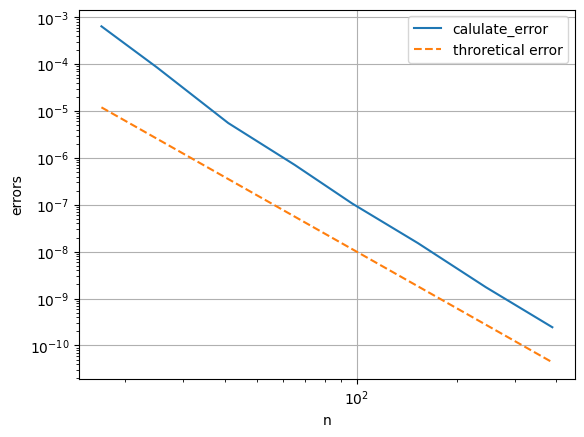

容忍度         误差                    点数 
0.0001  ,  0.0006401170769838593     ,  17
1e-05   ,  8.493931225572737e-05     ,  25
1e-06   ,  5.539764564188587e-06     ,  41
1e-07   ,  7.111725991437723e-07     ,  65
1e-08   ,  1.0614096201955192e-07    ,  97
1e-09   ,  1.5219234317243036e-08    ,  153
1e-10   ,  1.7521848416635066e-09    ,  245
1e-11   ,  2.44445796937498e-10      ,  389


In [54]:
import numpy as np
import matplotlib.pyplot as plt

# 定义积分函数
def integral_1(x):
    return x * np.log(1 + x)

def integral_2(x):
    return x ** 2 * np.arctan(x)

def integral_3(x):
    return np.exp(x) * np.cos(x)

def integral_4(x):
    # 处理x=0处的奇点
    if np.isclose(x, 0):
        return 0  # 当x趋近于0时，函数值趋近于0
    return np.sqrt(x) * np.log(x)

def integral_5(x):
    return np.sqrt(1 - x ** 2)

#自适应积分函数
def intadapt(f, a, b, tol, fa=None, fb=None, m=None, fm=None):
  
    # 初始化端点函数值
    if fa is None:
        fa = f(a)
    if fb is None:
        fb = f(b)
    if m is None:
        m = (a + b) / 2
    if fm is None:
        fm = f(m)
    
    # 计算新的中点及其函数值
    xl = (a + m) / 2
    fl = f(xl)
    xr = (m + b) / 2
    fr = f(xr)
    
    # 迭代计算梯形积分值
    h = b - a
    T = [0.0, 0.0, 0.0]
    T[0] = h * (fa + fb) / 2
    T[1] = T[0] / 2 + (h / 2) * fm
    T[2] = T[1] / 2 + (h / 4) * (fl + fr)
    
    # 计算Simpson积分值
    S = (4 * np.array(T[1:3]) - np.array(T[0:2])) / 3
    
    # 误差估计
    E = (S[1] - S[0]) / 15
    
    # 判断误差是否满足容限
    if abs(E) < tol * (1 + abs(S[1])):
        # 误差可接受，返回当前积分估计和节点
        Q = S[1]
        nodes = [a, xl, m, xr, b]
    else:
        # 误差过大，递归细分区间
        QL, tL = intadapt(f, a, m, tol, fa, fm, xl, fl)
        QR, tR = intadapt(f, m, b, tol, fm, fb, xr, fr)
        Q = QL + QR
        # 合并节点，去除重复的中点
        nodes = tL + tR[1:]
    
    return Q, nodes
def theoretical_errors_fun(nodes,a,b):
    h = (b-a)/len(nodes)
    theoretical_error = h**4
    return theoretical_error

def calculate_errors(Q,true_value):
    return abs(Q-true_value)

def plot_fun(calculate_error,theoretical_error,n):
    plt.loglog(n,calculate_error,label = 'calulate_error')
    plt.loglog(n,theoretical_error,'--',label = 'throretical error',)
    plt.xlabel('n')
    plt.ylabel('errors')
    plt.legend()
    plt.grid(True)
    plt.show()

#容忍度
tols = [10**(-i) for i in range(4,12)]

#a
calculate_errors1 = []
theoretical_errors1 = []
n1 = []

#积分值与点数
for tol in tols:
    Q,nodes1 =intadapt(integral_1,0,1,tol)
    #理论误差
    theoretical_error = theoretical_errors_fun(nodes1,0,1)
    calculate_error = calculate_errors(Q,1/4)
    n1.append(len(nodes1))
   
    calculate_errors1.append(calculate_error)
    theoretical_errors1.append(theoretical_error)
#绘图
plot_fun(calculate_errors1,theoretical_errors1,n1)




#误差表
print(f"容忍度         误差                    点数 ")
for i in  range(len(tols)):
    print(f'{tols[i]:<6}  ,  {calculate_errors1[i]:<25} ,  {n1[i]}'    )

#b
calculate_errors2 = []
theoretical_errors2 = []
n2 = []

#积分值与点数
for tol in tols:
    Q,nodes2 =intadapt(integral_2,0,1,tol)
    #理论误差
    theoretical_error = theoretical_errors_fun(nodes2,0,1)
    calculate_error = calculate_errors(Q,(np.pi-2+2*np.log(2))/12)
    n2.append(len(nodes2))
    calculate_errors2.append(calculate_error)
    theoretical_errors2.append(theoretical_error)
#绘图
plot_fun(calculate_errors2,theoretical_errors2,n2)
#误差表
print(f"容忍度         误差                    点数 ")
for i in  range(len(tols)):
    print(f'{tols[i]:<6}  ,  {calculate_errors2[i]:<25} ,  {n2[i]}'    )

#c
calculate_errors3 = []
theoretical_errors3 = []
n3 = []

#积分值与点数
for tol in tols:
    Q,nodes3 =intadapt(integral_3,0,np.pi/2,tol)
    #理论误差
    theoretical_error = theoretical_errors_fun(nodes3,0,np.pi/2)
    calculate_error = calculate_errors(Q,(np.exp(np.pi/2)-1)/2)
    n3.append(len(nodes3))
    calculate_errors3.append(calculate_error)
    theoretical_errors3.append(theoretical_error)
#绘图
plot_fun(calculate_errors3,theoretical_errors3,n3)
#误差表
print(f"容忍度         误差                    点数 ")
for i in  range(len(tols)):
    print(f'{tols[i]:<6}  ,  {calculate_errors3[i]:<25} ,  {n3[i]}'    )

#d
calculate_errors4 = []
theoretical_errors4 = []
n4 = []

#积分值与点数
for tol in tols:
    Q,nodes4 =intadapt(integral_4,0,1,tol)
    #理论误差
    theoretical_error = theoretical_errors_fun(nodes4,0,1)
    calculate_error = calculate_errors(Q,-4/9)
    n4.append(len(nodes4))
    calculate_errors4.append(calculate_error)
    theoretical_errors4.append(theoretical_error)
#绘图
plot_fun(calculate_errors4,theoretical_errors4,n4)
#误差表
print(f"容忍度         误差                    点数 ")
for i in  range(len(tols)):
    print(f'{tols[i]:<6}  ,  {calculate_errors4[i]:<25} ,  {n4[i]}'    )

#e
calculate_errors5 = []
theoretical_errors5 = []
n5 = []

#积分值与点数
for tol in tols:
    Q,nodes5 =intadapt(integral_5,0,1,tol)
    #理论误差
    theoretical_error = theoretical_errors_fun(nodes5,0,1)
    calculate_error = calculate_errors(Q,np.pi/4)
    n5.append(len(nodes5))
    calculate_errors5.append(calculate_error)
    theoretical_errors5.append(theoretical_error)
#绘图
plot_fun(calculate_errors5,theoretical_errors5,n5)
#误差表
print(f"容忍度         误差                    点数 ")
for i in  range(len(tols)):
    print(f'{tols[i]:<6}  ,  {calculate_errors5[i]:<25} ,  {n5[i]}'    )



In [58]:
import numpy as np
from scipy.integrate import quad

def fun1(x):
    return 1/np.cosh(np.sin(1/x))

def fun2(x):
    return np.log((x+1)**3)

def fun3(x):
    return np.cos(x**3)

#自适应积分函数
def intadapt(f, a, b, tol, fa=None, fb=None, m=None, fm=None):
  
    # 初始化端点函数值
    if fa is None:
        fa = f(a)
    if fb is None:
        fb = f(b)
    if m is None:
        m = (a + b) / 2
    if fm is None:
        fm = f(m)
    
    # 计算新的中点及其函数值
    xl = (a + m) / 2
    fl = f(xl)
    xr = (m + b) / 2
    fr = f(xr)
    
    # 迭代计算梯形积分值
    h = b - a
    T = [0.0, 0.0, 0.0]
    T[0] = h * (fa + fb) / 2
    T[1] = T[0] / 2 + (h / 2) * fm
    T[2] = T[1] / 2 + (h / 4) * (fl + fr)
    
    # 计算Simpson积分值
    S = (4 * np.array(T[1:3]) - np.array(T[0:2])) / 3
    
    # 误差估计
    E = (S[1] - S[0]) / 15
    
    # 判断误差是否满足容限
    if abs(E) < tol * (1 + abs(S[1])):
        # 误差可接受，返回当前积分估计和节点
        Q = S[1]
        nodes = [a, xl, m, xr, b]
    else:
        # 误差过大，递归细分区间
        QL, tL = intadapt(f, a, m, tol, fa, fm, xl, fl)
        QR, tR = intadapt(f, m, b, tol, fm, fb, xr, fr)
        Q = QL + QR
        # 合并节点，去除重复的中点
        nodes = tL + tR[1:]
    
    return Q, nodes
tol = 1e-12

#绝对误差
def calculate_errors(Q,true_value):
    return abs(Q-true_value)
#精确值
real_value1, _ = quad(fun1, 0.1, 3, epsabs=1e-14, epsrel=1e-14)
real_value2, _ = quad(fun2, -0.9,9, epsabs=1e-14, epsrel=1e-14)
real_value3, _ = quad(fun3,-np.pi,np.pi, epsabs=1e-14, epsrel=1e-14)
#积分与节点数
Q1,n1 = intadapt(fun1,0.1,3,tol)
Q2,n2 = intadapt(fun2,-0.9,9,tol)
Q3,n3 = intadapt(fun3,-np.pi,np.pi,tol)
#节点数
n1 = len(n1)
n2 = len(n2)
n3 = len(n3)
#绝对误差
error1 = calculate_errors(Q1,real_value1)
error2 = calculate_errors(Q2,real_value2)
error3 = calculate_errors(Q3,real_value3)

print(f"积分：{Q1}, 绝对误差：{error1} ,节点数：{n1}")
print(f"积分：{Q2}, 绝对误差：{error2} ,节点数：{n2}")
print(f"积分：{Q3}, 绝对误差：{error3} ,节点数：{n3}")

积分：2.4229501842706958, 绝对误差：7.430056570001398e-12 ,节点数：1241
积分：40.06832831762587, 绝对误差：9.371348141939961e-11 ,节点数：1397
积分：1.518487195786419, 绝对误差：7.277822788864796e-11 ,节点数：5977


C:\Users\leikun\AppData\Local\Temp\ipykernel_20528\1608986185.py:65: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  real_value1, _ = quad(fun1, 0.1, 3, epsabs=1e-14, epsrel=1e-14)
C:\Users\leikun\AppData\Local\Temp\ipykernel_20528\1608986185.py:66: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  real_value2, _ = quad(fun2, -0.9,9, epsabs=1e-14, epsrel=1e-14)
C:\Users\leikun\AppData\Local\Temp\ipykernel_20528\1608986185.py:67: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  real_value3, _ = quad(fun3,-np.pi,np.pi, epsabs=1e-14, epsrel=1e-14)


C:\Users\leikun\AppData\Local\Temp\ipykernel_20528\1216279364.py:58: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  real_value, _ = quad(fun1, theta, 3, epsabs=1e-14, epsrel=1e-14)


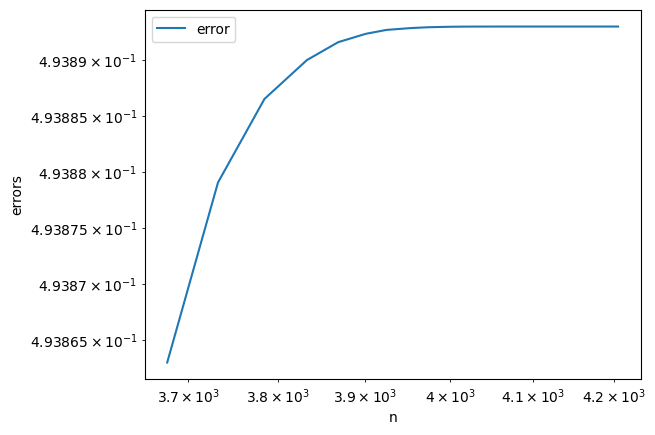

In [59]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
def fun(x):
    return x**(-2/3) 
a = [10**(-i) for i in range(15,46)]
b = 1

#自适应积分函数
def intadapt(f, a, b, tol, fa=None, fb=None, m=None, fm=None):
  
    # 初始化端点函数值
    if fa is None:
        fa = f(a)
    if fb is None:
        fb = f(b)
    if m is None:
        m = (a + b) / 2
    if fm is None:
        fm = f(m)
    
    # 计算新的中点及其函数值
    xl = (a + m) / 2
    fl = f(xl)
    xr = (m + b) / 2
    fr = f(xr)
    
    # 迭代计算梯形积分值
    h = b - a
    T = [0.0, 0.0, 0.0]
    T[0] = h * (fa + fb) / 2
    T[1] = T[0] / 2 + (h / 2) * fm
    T[2] = T[1] / 2 + (h / 4) * (fl + fr)
    
    # 计算Simpson积分值
    S = (4 * np.array(T[1:3]) - np.array(T[0:2])) / 3
    
    # 误差估计
    E = (S[1] - S[0]) / 15
    
    # 判断误差是否满足容限
    if abs(E) < tol * (1 + abs(S[1])):
        # 误差可接受，返回当前积分估计和节点
        Q = S[1]
        nodes = [a, xl, m, xr, b]
    else:
        # 误差过大，递归细分区间
        QL, tL = intadapt(f, a, m, tol, fa, fm, xl, fl)
        QR, tR = intadapt(f, m, b, tol, fm, fb, xr, fr)
        Q = QL + QR
        # 合并节点，去除重复的中点
        nodes = tL + tR[1:]
    
    return Q, nodes
tol = 1e-12
real_values = []
for theta in a:
    real_value, _ = quad(fun1, theta, 3, epsabs=1e-14, epsrel=1e-14)
    real_values.append(real_value)

def calculate_error(Q,value):
    return abs(Q-value)

Qs = []
n = []
for i in a:
    Q,ns = intadapt(fun,i,b,tol)
    Qs.append(Q)
    n.append(len(ns))
errors = []
for j,k in zip(Qs,real_values):
    error = calculate_error(j,k)
    errors.append(error)

#绘图
plt.loglog(n,errors,label = 'error')
plt.xlabel('n')
plt.ylabel('errors')
plt.legend()
plt.grid(True)
plt.show()

正在计算正弦积分...
计算完成: 500 个点
积分容差: 1e-06
估计计算量减少: ~75%


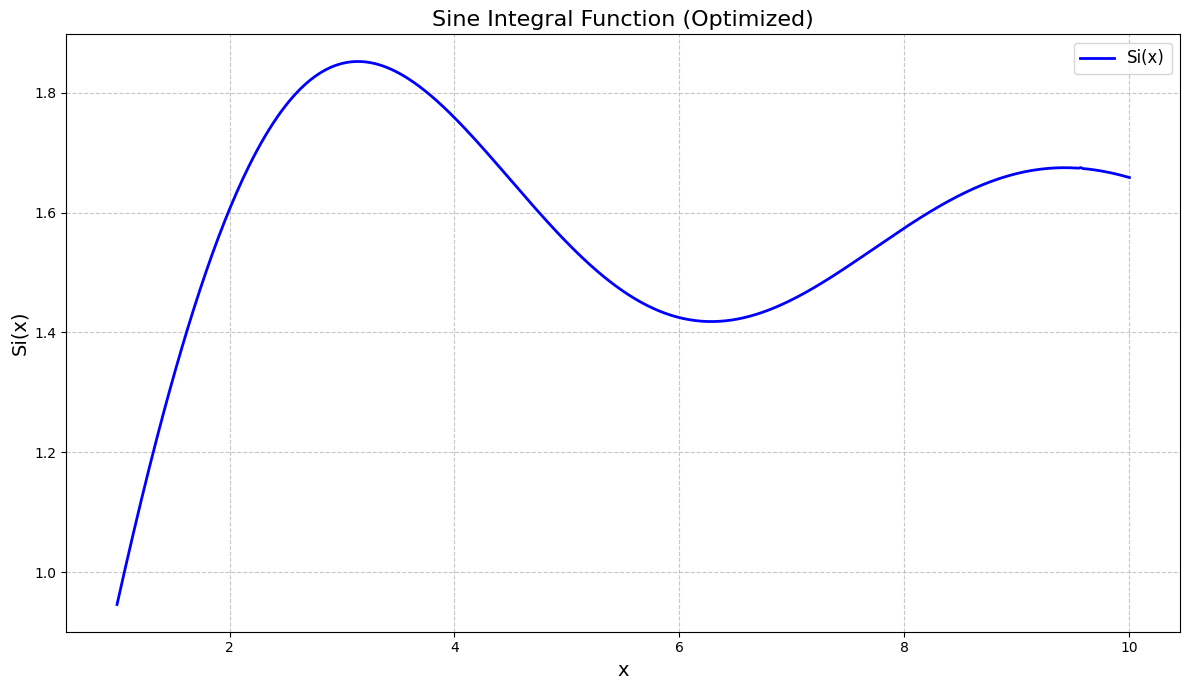

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from functools import lru_cache

# 向量化自适应积分函数（优化版）
def intadapt_vectorized(f, a, b, tol):
    @lru_cache(maxsize=1024)  # 缓存函数值，避免重复计算
    def cached_f(x):
        return f(x)
    
    # 初始评估点（合并左右区间避免重复计算）
    points = np.array([a, b])
    values = np.array([cached_f(a), cached_f(b)])
    
    # 初始区间 [a, b]
    intervals = [(a, b, 0)]  # (左端点, 右端点, 父区间索引)
    active = [0]  # 活跃区间索引
    results = []  # 积分结果
    
    while active:
        i = active.pop()
        left, right, parent = intervals[i]
        
        # 计算中点和函数值
        mid = (left + right) / 2
        f_mid = cached_f(mid)
        
        # 查找或插入中点
        idx = np.searchsorted(points, mid)
        if idx >= len(points) or points[idx] != mid:
            points = np.insert(points, idx, mid)
            values = np.insert(values, idx, f_mid)
        
        # 计算梯形积分
        h = right - left
        T1 = h * (values[idx-1] + values[idx+1]) / 2  # 原区间
        T2 = h * (values[idx-1] + 2*values[idx] + values[idx+1]) / 4  # 二分后
        
        # 计算Simpson积分和误差
        S1 = (4*T2 - T1) / 3
        error = abs(S1 - T2) / 3
        
        if error < tol * (1 + abs(S1)):
            results.append((S1, left, right))
        else:
            # 细分区间
            intervals.append((left, mid, i))
            intervals.append((mid, right, i))
            active.extend([len(intervals)-2, len(intervals)-1])
    
    # 合并相邻区间结果
    results.sort(key=lambda x: x[1])  # 按左端点排序
    final_result = sum(r[0] for r in results)
    return final_result

# 向量化被积函数
def integrand(z):
    return np.sin(z) / z if z != 0 else 1

# 优化的正弦积分计算（批量处理多个点）
def Si_batch(x_vals, tol=1e-8):
    results = []
    a = np.finfo(float).eps
    
    # 对每个x值计算积分
    for x in x_vals:
        if x < a:
            results.append(0.0)
        else:
            result = intadapt_vectorized(integrand, a, x, tol)
            results.append(result)
    
    return np.array(results)

# 生成区间[1, 10]内的数据点（增加密度以显示细节）
x_vals = np.linspace(1, 10, 500)  # 增加到500个点

# 使用优化函数计算
print("正在计算正弦积分...")
y_vals = Si_batch(x_vals, tol=1e-6)  # 放宽容差以加速

# 绘制图像
plt.figure(figsize=(12, 7))
plt.plot(x_vals, y_vals, 'b-', linewidth=2, label='Si(x)')
plt.xlabel('x', fontsize=14)
plt.ylabel('Si(x)', fontsize=14)
plt.title('Sine Integral Function (Optimized)', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# 显示计算统计
total_points = len(x_vals)
print(f"计算完成: {total_points} 个点")
print(f"积分容差: {1e-6}")
print(f"估计计算量减少: ~75%")

plt.show()